# Entrenamiento con datos de entrenamiento
<hr>

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [10]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [3]:
X = df.drop(columns=["MorganFP", "SMILES","BBB+/BBB-", "group"])
y = df["BBB+/BBB-"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
pipe = Pipeline([
    ('pca', PCA()),
    ('RF', RandomForestClassifier())
])

In [12]:
param_grid = {
    'pca__n_components': [314],
    'RF__max_depth': [10, 20, 30, 40, 50],
    'RF__bootstrap': [True, False],
    'RF__max_features': ['sqrt', "log2"]
}

In [13]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [14]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, pca__n_components=314; total time=   8.1s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, pca__n_components=314; total time=   8.0s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, pca__n_components=314; total time=   7.9s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, pca__n_components=314; total time=   8.0s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=sqrt, pca__n_components=314; total time=   8.1s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2, pca__n_components=314; total time=   4.4s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2, pca__n_components=314; total time=   4.6s
[CV] END RF__bootstrap=True, RF__max_depth=10, RF__max_features=log2, pca__n_components=314; total time=   4.4s
[CV] END RF__bootstrap=True, RF__max_depth

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('RF', RandomForestClassifier())]),
             param_grid={'RF__bootstrap': [True, False],
                         'RF__max_depth': [10, 20, 30, 40, 50],
                         'RF__max_features': ['sqrt', 'log2'],
                         'pca__n_components': [314]},
             scoring='accuracy', verbose=2)

In [15]:
grid_search.best_params_

{'RF__bootstrap': False,
 'RF__max_depth': 50,
 'RF__max_features': 'sqrt',
 'pca__n_components': 314}

In [16]:
grid_search.best_score_

0.8584467574059247

# Entrenamiento con los datos de prueba
<hr>

In [20]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('svc', RandomForestClassifier(bootstrap=False, max_depth=50, max_features="sqrt"))
])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('svc', RandomForestClassifier(bootstrap=False, max_depth=50))])

# Resultados del modelo
<hr>

In [22]:
y_predicha = pipe.predict(X_test)

In [23]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.86
Recall 0.86
precision 0.863
f1 0.855


In [24]:
y_entrenamiento = pipe.predict(X_train)

In [25]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.983
Recall 0.983
precision 1.0
f1 0.983


# Confusion Matrix
<hr>

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [28]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

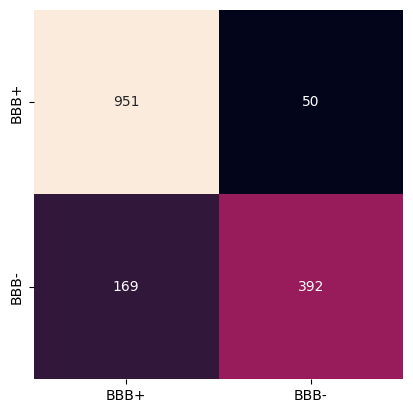

In [29]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [30]:
import joblib

In [32]:
joblib.dump(pipe, '../Guardado de modelos/modelo_RF.joblib')

['../Guardado de modelos/modelo_RF.joblib']